In [241]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

$$
-\frac{\hbar^2}{2m}\frac{\partial^2\phi}{\partial x^2} + V(x)\phi  = E\phi
$$

In discrete form becomes

\begin{align*}
&-\frac{\hbar^2}{2m}\frac{\phi_{i-1}-2\phi_i+\phi_{i+1}}{\Delta x^2} + V(x)\phi_i  = E\phi_i\\
&-\frac{\phi_{i-1}+\phi_{i+1}}{2\Delta x^2} + \left(\frac{m}{\hbar^2}V(x) + \frac{1}{\Delta x^2}\right) \phi_i = \frac{mE}{\hbar^2}\phi_i\\
\end{align*}

If furthermore we know $\phi$ is a bound state, we can say that $\phi_0 = \phi_n = 0$

$$
\begin{pmatrix}
d_1 & e & 0 & \cdots & 0\\
e & d_2 & e & \cdots & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
0 & \cdots & 0 & e & d_{n-1}
\end{pmatrix}\begin{pmatrix}
\phi_1\\
\phi_2\\
\vdots\\
\phi_{n-1}
\end{pmatrix} = \frac{mE}{\hbar^2}\begin{pmatrix}\phi_1\\\phi_2\\\vdots\\\phi_{n-1}\end{pmatrix}
$$

where $d_i = \frac{m}{\hbar^2}V(x_i) + \frac{1}{\Delta x^2}$ and $e = -\frac{1}{2\Delta x^2}$

While in this problem the time-independent schrödinger equation is not linear; 

what's linear is the time-dependent schrödinger equation $-\frac{\hbar^2}{2m}\frac{\partial^2\phi}{\partial x^2} + V(x)\phi = i\hbar\frac{\partial\phi}{\partial t}$

In [242]:
N = 2000
dy = 1/N
y = np.linspace(0,1,N+2)

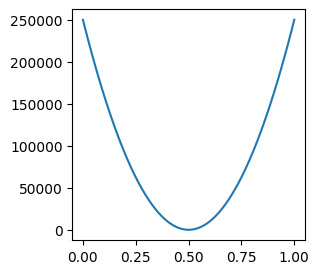

In [272]:
def V(y):
    return 1000000*(y-0.5)**2        #the larger the better (as potential ouside is closer to infinite, the latter, what we assumed)
    # return 100*abs(y-0.5)
    # return 100*y
    # return 100**y
    # return -100 * np.ones(len(y))
    # return 100*(y>0.5)
    # return 1000*np.random.random(len(y))
    # return 100/(y+0.01)
    # return 100*np.sqrt(0.25-(0.5-y)**2)
    # return 100/(1+np.e**-(10*y)) - 50
    # return 100*np.tanh(3*y)
plt.figure(figsize=(3,3))
plt.plot(y, V(y))

In [273]:
d = 1/dy**2 + V(y)[1:-1]
e = -1/(2*dy**2) ** np.ones(len(d)-1)
lam, v = eigh_tridiagonal(d,e)

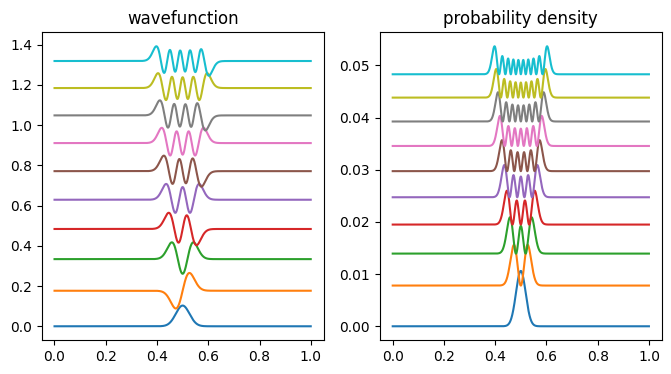

In [274]:
fig, axs = plt.subplots(1,2,figsize=(8,4))
for i in range(10):
    axs[0].set_title('wavefunction')
    axs[0].plot(y[1:-1], v.T[i] + 2*max(v.T[i])*i)
    axs[1].set_title('probability density')
    axs[1].plot(y[1:-1], v.T[i]**2 + max(v.T[i]**2)*i)


<BarContainer object of 10 artists>

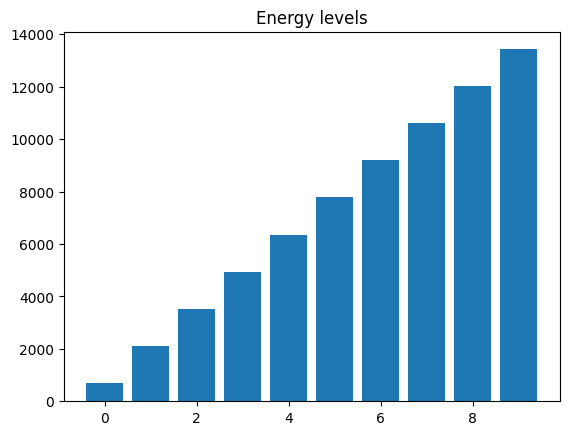

In [275]:
plt.title('Energy levels')
plt.bar(np.arange(10), lam[:10])

In [276]:
for i in range(1,10):
    print(lam[i]-lam[i-1])

1413.444368663426
1413.3819249098838
1413.3194770175223
1413.2570249853507
1413.194568812577
1413.132108498231
1413.0696440413594
1413.0071754411474
1412.94470269659
